#### `Import Libraries`

In [13]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
%matplotlib inline

#### `Required Functions`

In [9]:
def get_mean(arr):
    '''
    Mean is the average of a data set.
    The mode is the most common number in a data set.
    The median is the middle of the set of numbers.
    Standard deviation is a measure of the amount of variation or dispersion of a set of values.
    A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, 
    while a high standard deviation indicates that the values are spread out over a wider range.
    '''    
    return np.sum(arr)/len(arr)

def get_variance(arr, mean):
    '''
    Variance is a measure of how much the data for a variable varies from it's mean
    '''    
    return np.sum((arr-mean)**2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    '''
    Covariance is a measure of relationship between 2 variables that is scale dependent,
    i.e. how much will a variable change when another variable changes
    What is correlation : Correlation is a statistical measure that expresses the extent to which two variables are linearly related
    Correlation overcomes the lack of scale dependency that is present in covariance by standardizing the values. 
    This standardization converts the values to the same scale, the example below will the using the Pearson Correlation Coeffiecient. 
    The equation for converting data to Z-scores
    correlation formula : z_score = (ithvalue(xi) - mean(x)) / stdev(x)
    '''
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

def get_regression_coefficients(x, y):
    '''
    Regression Equation: y = mx + c
    # m(slope/coefficient/weight) = cov(x, y) / var(x)
    # c(constant/intercept/bias) = y - m*x
    '''
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    c = y_mean - x_mean*m
    return m, c

def train_model(df):
    '''
    Train Ordinary Least Squares Regression Model
    '''
    x = df["Product_Sell"]
    y = df["Revenue_Generation"]
    slope, intercept = get_regression_coefficients(x, y)
    return slope, intercept

def get_predictions(slope, intercept, indep_arr):
    ''' 
    Get Predictions
    '''
    predictions_list = [(slope*x + intercept) for x in indep_arr]
    return predictions_list

def get_plot(df, x_col, y_col, pred_col, prediction_flag):
    '''
    Independent Variables vs Dependent Variables Plot
    '''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    plt.scatter(x_col, y_col, data=df)
    if prediction_flag == True:
        ax = sns.lineplot(x_col, pred_col, data=df, color = "orange")
        ax.lines[0].set_linestyle("--")
        sns.scatterplot(x_col, pred_col, data=df, color = 'black')
        ax.get_legend().remove()
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    # plt.title("Product_Sell vs Revenue_Generation: $Y_i$ vs $\hat{Y}_i$")
    plt.title("{} vs {}".format(x_col, y_col))
    plt.show()

def actuals_vs_prediction_plot(df):
    '''
    Actuals vs Prediction Plot
    '''    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    sns.scatterplot("Product_Sell", "Revenue_Generation", data=df, color = 'blue', label="Actual")
    sns.scatterplot("Product_Sell", "Predictions", data=df, color = 'orange', label="Prediction")
    plt.xlabel("Product_Sell")
    plt.ylabel("Revenue_Generation")
    # plt.title("Product_Sell vs Revenue_Generation: $Y_i$ vs $\hat{Y}_i$")
    plt.title("Actuals vs Predictions")
    plt.show()

def mse(true,pred):
    ''' 
    Calculate MSE value
    '''    
    return np.mean((pred-true)**2)

def rmse(true,pred):
    ''' 
    Calculate RMSE value
    '''
    return mse(true,pred)**0.5

def r_squared(true,pred):
    ''' 
    Calculate r_squared value
    '''    
    true_mean=true.mean()
    pred_mean=pred.mean()
    tot=((true-true_mean)**2).sum(axis=0)
    obs=((true-pred)**2).sum(axis=0)
    return 1-(obs/tot)

#### `Sample Data`

In [5]:
companya_sales_data = """
Product_Sell,Revenue_Generation
10,1000
15,1400
18,1800
22,2400
26,2600
30,2800
5,700
31,2900
"""

df = pd.read_table(StringIO(companya_sales_data), sep=",")
display(HTML(df.to_html()))

,Product_Sell,Revenue_Generation
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


- **Product_Sell vs Revenue_Generation Plot**

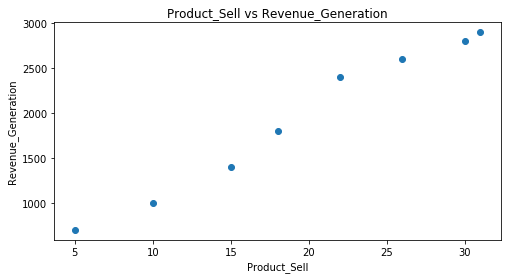

In [10]:
##### Plot #####
get_plot(df, x_col="Product_Sell", y_col="Revenue_Generation",pred_col="Covariance_Variance_Coeffs_Predictions", prediction_flag=False)

#### `Train Model From Scratch - Using [Covariance + Variance : Correlation coefficients]`
- **Train Ordinary Least Squares Regression Model**

In [7]:
##### Train Ordinary Least Squares Regression Model & Get its Coeffcients #####
df_train = df.loc[:len(df)-3]
slope, intercept = train_model(df_train)
print(f"Slope : {slope}")
print("intercept : {}".format(intercept))

Slope : 95.97024178549286
intercept : 64.60012399256061


- **Get Predictions**

In [8]:
##### Get Predictions #####
predictions_list = get_predictions(slope, intercept, df_train["Product_Sell"].tolist())
df_train["Covariance_Variance_Coeffs_Predictions"] = predictions_list

display(HTML(df_train.to_html()))

,Product_Sell,Revenue_Generation,Covariance_Variance_Coeffs_Predictions
0,10,1000,1024.302542
1,15,1400,1504.153751
2,18,1800,1792.064476
3,22,2400,2175.945443
4,26,2600,2559.826410
5,30,2800,2943.707378


- **Product_Sell vs Revenue_Generation + Regression Plot**

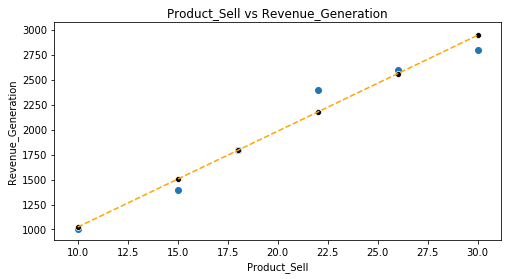

In [11]:
##### Plot #####
get_plot(df_train, x_col="Product_Sell", y_col="Revenue_Generation",pred_col="Covariance_Variance_Coeffs_Predictions", prediction_flag=True)

#### `Train Model From Scratch - Using [Linear Algebra]`
- **Reference Links**
- `https://godatadriven.com/blog/the-linear-algebra-behind-linear-regression/`
- `https://datascienceplus.com/linear-regression-from-scratch-in-python/`

![](readme_images/Linear_Algebra_1.png)
![](readme_images/Linear_Algebra_2.png)
![](readme_images/Linear_Algebra_3.png)
![](readme_images/Linear_Algebra_4.png)
![](readme_images/Linear_Algebra_5.png)

- ### **`Observation`**
- Here, uT is error values & v is X span(indep. variables value). So we are trying to solve this uTv, to find orthogonal / perpendicular to each other (i.e., error values & X span(indep. variables value)). 
- So that predictions error will be less as much possible by staying to near to y(actual values). As shown by author in above geometrical images.
- In this process of finding orthogonal line / solving this orthogonal equation(i.e., above formula). We get our best regression coefficients & intercepts, which helps to solve this equation.    

In [12]:
##### Constructing the matrix X #####
X = np.asarray([np.ones(len(df_train)), df_train["Product_Sell"]]).T
print(X)

[[ 1. 10.]
 [ 1. 15.]
 [ 1. 18.]
 [ 1. 22.]
 [ 1. 26.]
 [ 1. 30.]]


In [15]:
# intercept, slope = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
intercept, slope = inv(X.T @ X) @ X.T @ df_train["Revenue_Generation"]
print(f"Slope : {slope}")
print("intercept : {}".format(intercept))

Slope : 95.97024178549287
intercept : 64.60012399255515


- **Get Predictions**

In [16]:
##### Get Predictions #####
predictions_list = get_predictions(slope, intercept, df_train["Product_Sell"].tolist())
df_train["Linear_Algebra_Coeffs_Predictions"] = predictions_list

display(HTML(df_train.to_html()))

,Product_Sell,Revenue_Generation,Covariance_Variance_Coeffs_Predictions,Linear_Algebra_Coeffs_Predictions
0,10,1000,1024.302542,1024.302542
1,15,1400,1504.153751,1504.153751
2,18,1800,1792.064476,1792.064476
3,22,2400,2175.945443,2175.945443
4,26,2600,2559.826410,2559.826410
5,30,2800,2943.707378,2943.707378


- **Product_Sell vs Revenue_Generation + Regression Plot**

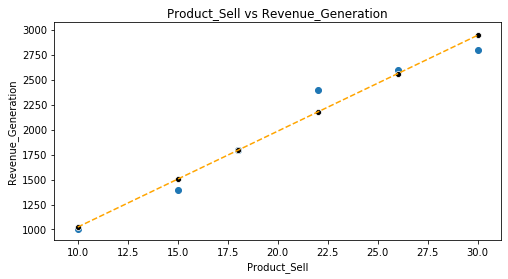

In [17]:
##### Plot #####
get_plot(df_train, x_col="Product_Sell", y_col="Revenue_Generation",pred_col="Linear_Algebra_Coeffs_Predictions", prediction_flag=True)

#### `Train Model - Using Sklearn`

In [18]:
lm = LinearRegression()

X_train = np.array(df_train['Product_Sell']).reshape(-1, 1)
Y_train = np.array(df_train['Revenue_Generation']).reshape(-1, 1)

##### Train Model #####
lm.fit(X_train, Y_train)
# lm.coef_[0]
print("Coefficient --> ", lm.coef_)
print("Intercept --> ", lm.intercept_)

Coefficient -->  [[95.97024179]]
Intercept -->  [64.60012399]


In [22]:
df_temp = np.array(df_train["Product_Sell"].tolist()).reshape(-1, 1)
print(df_temp)

predictions_list = lm.predict(df_temp)
df_train["Sklearn_Coefficients_Predictions"] = predictions_list

display(HTML(df_train.to_html()))

[[10]
 [15]
 [18]
 [22]
 [26]
 [30]]


,Product_Sell,Revenue_Generation,Covariance_Variance_Coeffs_Predictions,Linear_Algebra_Coeffs_Predictions,Sklearn_Coefficients_Predictions
0,10,1000,1024.302542,1024.302542,1024.302542
1,15,1400,1504.153751,1504.153751,1504.153751
2,18,1800,1792.064476,1792.064476,1792.064476
3,22,2400,2175.945443,2175.945443,2175.945443
4,26,2600,2559.826410,2559.826410,2559.826410
5,30,2800,2943.707378,2943.707378,2943.707378


- **Product_Sell vs Revenue_Generation + Regression Plot**

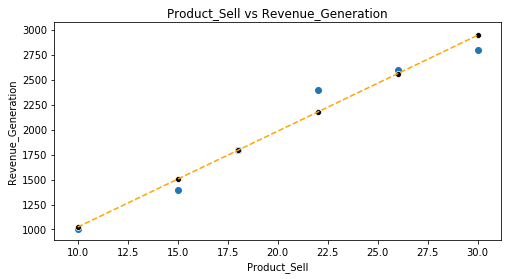

In [23]:
##### Plot #####
get_plot(df_train, x_col="Product_Sell", y_col="Revenue_Generation",pred_col="Sklearn_Coefficients_Predictions", prediction_flag=True)